## This code is for the visualization of teporal evaluation of the links and 2-simplex of the hypergraph

<IPython.core.display.Javascript object>


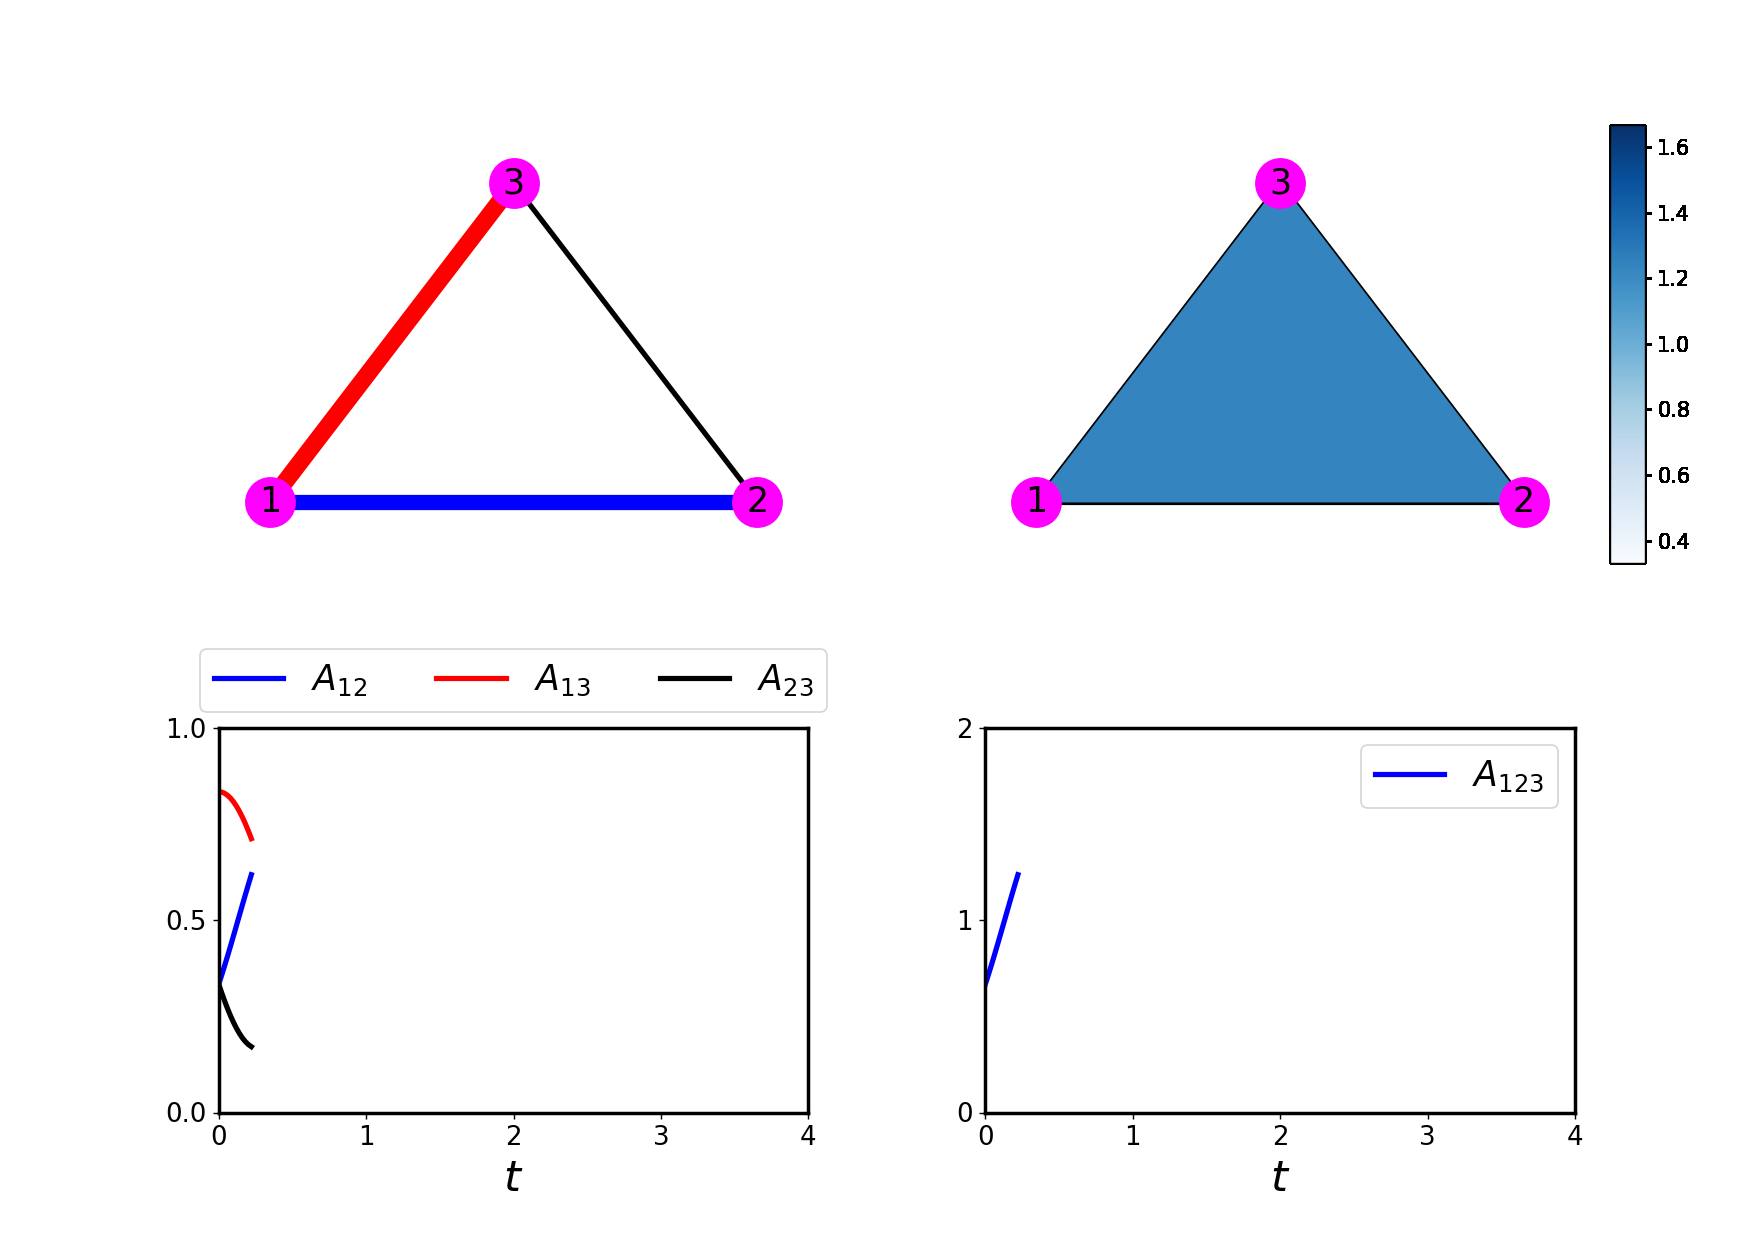

In [16]:

Ω=2
# Generate the time points and corresponding edge weights
time_points = np.linspace(0, 4, num=200)  # Adjust num for more time points

# Define the three sine functions with different frequencies and phases
def sine_func1(t):
    return 1/2- 1/3* np.cos(np.pi/3 + 2 *Ω* t) ##(1,2)

def sine_func2(t):
    return 1/2 + 1/3* np.cos( 2 *Ω* t)   ##(1,3)

def sine_func3(t):
    return 1/2- 1/3* np.cos(np.pi/3 - 2 *Ω* t) ##(2,3)

def sine_func4(t):
    return 1- 2/3* np.cos(np.pi/3 + 2 *Ω* t)  ##(1,2,3)

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with positions
G.add_node(1, pos=(0, 0))
G.add_node(2, pos=(1, 0))
G.add_node(3, pos=(0.5, np.sqrt(3)/2))

# Add edges to the graph
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)

# Create figure and axes for the animation
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Define update function for animation
def update(frame):
    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    
    # Calculate the edge weights for each edge using the respective sine functions
    weight1 = sine_func1(time_points[frame])
    weight2 = sine_func2(time_points[frame])
    weight3 = sine_func3(time_points[frame])

    # Add the edge weights to the graph
    G[1][2]['weight'] = weight1
    G[1][3]['weight'] = weight2
    G[2][3]['weight'] = weight3
    
    G[1][2]['color'] = 'blue'
    G[1][3]['color'] = 'red'
    G[2][3]['color'] = 'black'

    # Create a list of colors for visualizing the edges
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    colors= [G[u][v]['color'] for u, v in G.edges()]

    # Normalize the edge weights to the range [min_width, max_width]
    min_width = 3  # Adjust the minimum edge width as desired
    max_width = 10  # Adjust the maximum edge width as desired
    normalized_weights = np.interp(edge_weights, (min(edge_weights), max(edge_weights)), (min_width, max_width))

    # Get the positions of the nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the nodes and edges on both subplots
    nx.draw_networkx_nodes(G, pos, node_color='magenta', node_size=800, ax=ax1)
    #nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=normalized_weights, edge_cmap=plt.cm.jet, ax=ax1)
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=normalized_weights, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=20,ax=ax1)
    nx.draw_networkx_nodes(G, pos, node_color='magenta', node_size=800, ax=ax2)
    nx.draw_networkx_edges(G, pos, edge_color='black', width=3, ax=ax2)
    nx.draw_networkx_labels(G, pos, font_size=20,ax=ax2)

    # Get the positions of the nodes
    node_pos = np.array([pos[node] for node in sorted(G.nodes())])

    # Create the coordinates for the triangle
    triangle_coords = np.array([node_pos[0], node_pos[1], node_pos[2], node_pos[0]])

    # Get the color for the triangle based on a sine data array at each time instance
    triangle_data = np.array([sine_func4(time_points[frame])])  # Sine data array, adjust as per your requirements
    triangle_color = np.interp(triangle_data, (0.3333, 1.6667), (0, 1))
    #triangle_color = triangle_data
    #triangle_color =((triangle_data - np.min(triangle_data)) / (np.max(triangle_data) - np.min(triangle_data))) 
        
        
    # Draw a filled polygon representing the triangle
    ax2.fill(triangle_coords[:, 0], triangle_coords[:, 1], color=plt.cm.Blues(triangle_color))

    # Set title and axis labels for both subplots
    #ax1.set_title(f'Time: {frame}/{len(time_points)-1}')
    ax1.set_axis_off()
    #ax2.set_title(f'Time: {frame}/{len(time_points)-1}')
    ax2.set_axis_off()
    
    #fig.suptitle(f'Time: {frame}/{len(time_points)-1}')

    
    cax = fig.add_axes([0.92, 0.55, 0.02, 0.35]) # Adjust the position and size of the colorbar as desired
    cmap = plt.cm.Blues
    norm = plt.Normalize(vmin=0.3333, vmax=1.6667)  # Adjust the minimum and maximum values of the colorbar as per your data range
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar.ax.tick_params(labelsize=12)  # Increase fontsize of colorbar ticks

    #cbar.set_label('Triangle Color')
     
    
    ax3.plot(time_points[:frame + 1], [sine_func1(t) for t in time_points[:frame + 1]], color='blue',linewidth=3,label='$A_{12}$')
    ax3.plot(time_points[:frame + 1], [sine_func2(t) for t in time_points[:frame + 1]], color='red',linewidth=3,label='$A_{13}$')
    ax3.plot(time_points[:frame + 1], [sine_func3(t) for t in time_points[:frame + 1]], color='black',linewidth=3,label='$A_{23}$')
    ax4.plot(time_points[:frame + 1], [sine_func4(t) for t in time_points[:frame + 1]], color='blue',linewidth=3,label='$A_{123}$')
        
      
    ax3.set_ylim(0,1)
    ax3.set_xlim(0,3)
    ax3.set_xticks([0, 1, 2, 3, 4])  # Set xticks
    ax3.set_yticks([0, 0.5, 1])  # Set yticks
    ax3.set_xlabel('$t$',fontsize=25)
    ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3,fontsize=20)
    ax4.set_ylim(0,2)
    ax4.set_xlim(0,3)
    ax4.set_xticks([0, 1, 2, 3, 4])  # Set xticks
    ax4.set_yticks([0, 1, 2])  # Set yticks
    ax4.set_xlabel('$t$',fontsize=25)
    ax4.legend(fontsize=20)
    
    ax3.tick_params(axis='both', which='major', labelsize=15)  # Increase fontsize of axis ticks in ax3
    ax4.tick_params(axis='both', which='major', labelsize=15)  # Increase fontsize of axis ticks in ax4
    
    ax3.spines['left'].set_linewidth(2)
    ax3.spines['bottom'].set_linewidth(2)
    ax3.spines['right'].set_linewidth(2)
    ax3.spines['top'].set_linewidth(2)

    ax4.spines['left'].set_linewidth(2)
    ax4.spines['bottom'].set_linewidth(2)
    ax4.spines['right'].set_linewidth(2)
    ax4.spines['top'].set_linewidth(2)


        
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(time_points), interval=300)

# Save the animation as a video file
video_path = 'weighted_network_animation.avi'
ani.save(video_path, writer='ffmpeg',dpi=300)

# Display the video as HTML
HTML(f'<video controls src="{video_path}">')

# Show the plot (optional)
plt.show()


<IPython.core.display.Javascript object>


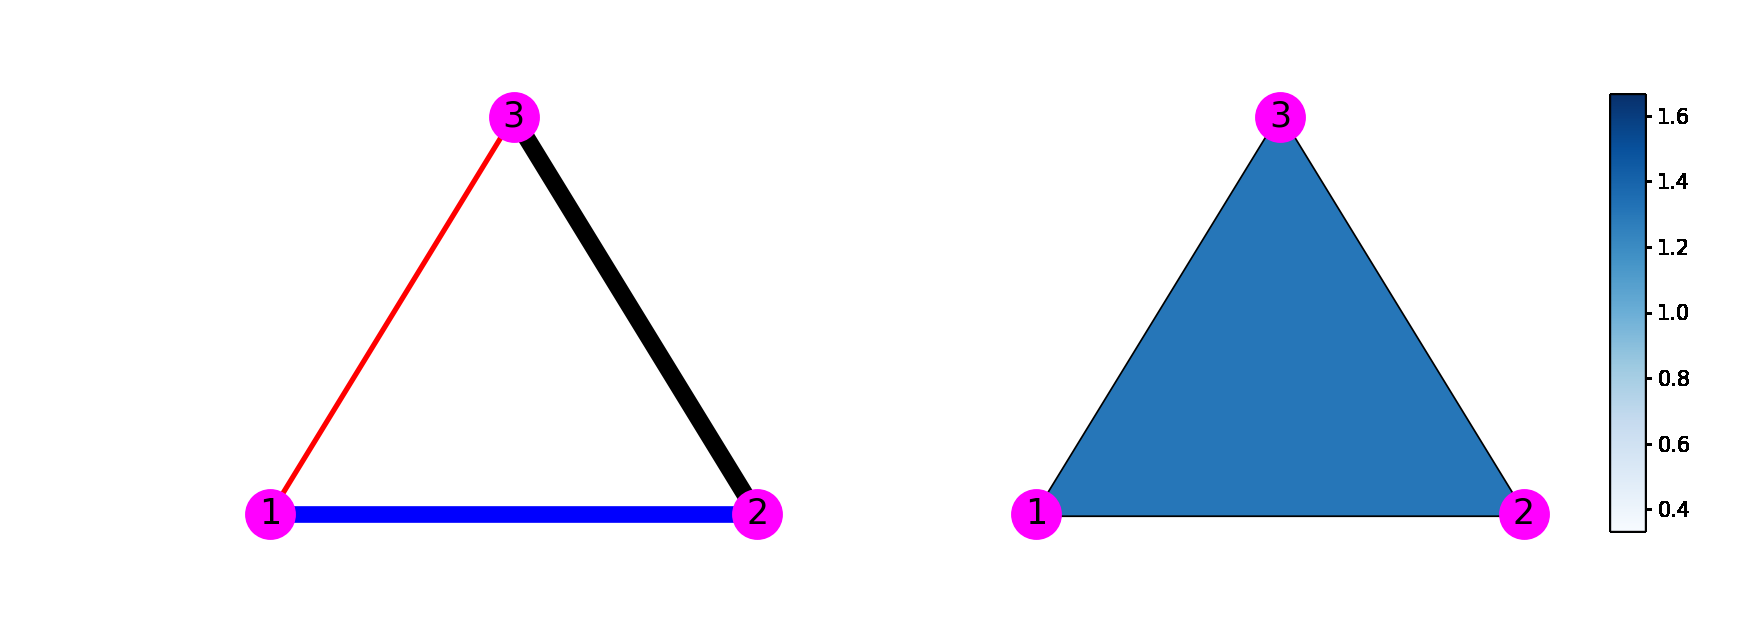

In [7]:

Ω=2
# Generate the time points and corresponding edge weights
time_points = np.linspace(0, 4, num=200)  # Adjust num for more time points

# Define the three sine functions with different frequencies and phases
def sine_func1(t):
    return 1/2- 1/3* np.cos(np.pi/3 + 2 *Ω* t) ##(1,2)

def sine_func2(t):
    return 1/2 + 1/3* np.cos( 2 *Ω* t)   ##(1,3)

def sine_func3(t):
    return 1/2- 1/3* np.cos(np.pi/3 - 2 *Ω* t) ##(2,3)

def sine_func4(t):
    return 1- 2/3* np.cos(np.pi/3 + 2 *Ω* t)  ##(1,2,3)

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph with positions
G.add_node(1, pos=(0, 0))
G.add_node(2, pos=(1, 0))
G.add_node(3, pos=(0.5, np.sqrt(3)/2))

# Add edges to the graph
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)

# Create figure and axes for the animation
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Define update function for animation
def update(frame):
    ax1.clear()
    ax2.clear()
    #ax3.clear()
    #ax4.clear()
    
    # Calculate the edge weights for each edge using the respective sine functions
    weight1 = sine_func1(time_points[frame])
    weight2 = sine_func2(time_points[frame])
    weight3 = sine_func3(time_points[frame])

    # Add the edge weights to the graph
    G[1][2]['weight'] = weight1
    G[1][3]['weight'] = weight2
    G[2][3]['weight'] = weight3
    
    G[1][2]['color'] = 'blue'
    G[1][3]['color'] = 'red'
    G[2][3]['color'] = 'black'

    # Create a list of colors for visualizing the edges
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    colors= [G[u][v]['color'] for u, v in G.edges()]

    # Normalize the edge weights to the range [min_width, max_width]
    min_width = 3  # Adjust the minimum edge width as desired
    max_width = 10  # Adjust the maximum edge width as desired
    normalized_weights = np.interp(edge_weights, (min(edge_weights), max(edge_weights)), (min_width, max_width))

    # Get the positions of the nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the nodes and edges on both subplots
    nx.draw_networkx_nodes(G, pos, node_color='magenta', node_size=800, ax=ax1)
    #nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=normalized_weights, edge_cmap=plt.cm.jet, ax=ax1)
    nx.draw_networkx_edges(G, pos, edge_color=colors, width=normalized_weights, ax=ax1)
    nx.draw_networkx_labels(G, pos, font_size=20,ax=ax1)
    nx.draw_networkx_nodes(G, pos, node_color='magenta', node_size=800, ax=ax2)
    nx.draw_networkx_edges(G, pos, edge_color='black', width=3, ax=ax2)
    nx.draw_networkx_labels(G, pos, font_size=20,ax=ax2)

    # Get the positions of the nodes
    node_pos = np.array([pos[node] for node in sorted(G.nodes())])

    # Create the coordinates for the triangle
    triangle_coords = np.array([node_pos[0], node_pos[1], node_pos[2], node_pos[0]])

    # Get the color for the triangle based on a sine data array at each time instance
    triangle_data = np.array([sine_func4(time_points[frame])])  # Sine data array, adjust as per your requirements
    triangle_color = np.interp(triangle_data, (0.3333, 1.6667), (0, 1))
    #triangle_color = triangle_data
    #triangle_color =((triangle_data - np.min(triangle_data)) / (np.max(triangle_data) - np.min(triangle_data))) 
        
        
    # Draw a filled polygon representing the triangle
    ax2.fill(triangle_coords[:, 0], triangle_coords[:, 1], color=plt.cm.Blues(triangle_color))

    # Set title and axis labels for both subplots
    #ax1.set_title(f'Time: {frame}/{len(time_points)-1}')
    ax1.set_axis_off()
    #ax2.set_title(f'Time: {frame}/{len(time_points)-1}')
    ax2.set_axis_off()
    
    #fig.suptitle(f'Time: {frame}/{len(time_points)-1}')

    
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) # Adjust the position and size of the colorbar as desired
    cmap = plt.cm.Blues
    norm = plt.Normalize(vmin=0.3333, vmax=1.6667)  # Adjust the minimum and maximum values of the colorbar as per your data range
    #cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
    cbar.ax.tick_params(labelsize=12)  # Increase fontsize of colorbar ticks

    #cbar.set_label('Triangle Color')
     
    

        
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(time_points), interval=100)

# Save the animation as a video file
video_path = 'only_weighted_network_animation_2.mp4'
ani.save(video_path, writer='ffmpeg',dpi=300)

# Display the video as HTML
HTML(f'<video controls src="{video_path}">')

# Show the plot (optional)
plt.show()
